**NAMA : DELILA SEPTIANI DWI PUTRI**

**NIM  : 1306620028**

**KELAS : FISIKA A 2020**

---
### **TUGAS 7 PCD - KONVOLUSI DAN KORELASI CITRA**

### **1. Buktikan bahwa konvolusi sama dengan korelasi yang kernelnya diputar $180^{\circ}$**

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

#### Original Image

Text(0.5, 1.0, 'Original Image')

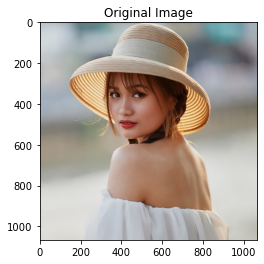

In [54]:
pic = cv2.imread('woman.jpeg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic_as_array = np.array(pic, dtype=float)/255

plt.imshow(pic)
plt.title('Original Image')

#### Konvolusi

In [55]:
#Kernel yang digunakan adalah sobel convolution cernels

kernel = np.array([[2,2,4,2,2],[1,1,2,1,1],[0,0,0,0,0], [-1,-1,-2,-1,-1], [-2,-2,-4,-2,-2]])
rgb_kernel = np.ones((5, 5, 3))
rgb_kernel[:, :, 0] = kernel
rgb_kernel[:, :, 1] = kernel
rgb_kernel[:, :, 2] = kernel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Convolution Image')

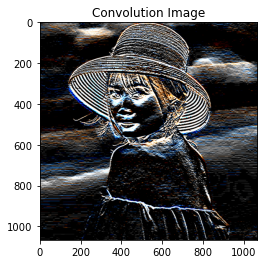

In [56]:
conv_pic  = ndimage.convolve(pic_as_array, rgb_kernel)
plt.imshow(conv_pic)
plt.title('Convolution Image')

#### Korelasi 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Correlation Image')

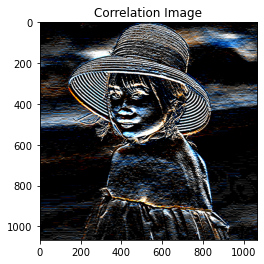

In [57]:
corr_pic  = ndimage.correlate(pic_as_array, rgb_kernel)
plt.imshow(corr_pic)
plt.title('Correlation Image')

#### Konvolusi dengan Korelasi yang kernelnya diputar $180^{\circ}$

In [58]:
#Rotasi matriks
kernel_rot = np.flip(np.flip(kernel,1),0)
print("Kernel yang diputar 180 derajat :\n ",kernel_rot)

rgb_kernel[:, :, 0] = kernel_rot
rgb_kernel[:, :, 1] = kernel_rot
rgb_kernel[:, :, 2] = kernel_rot

Kernel yang diputar 180 derajat :
  [[-2 -2 -4 -2 -2]
 [-1 -1 -2 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  2  1  1]
 [ 2  2  4  2  2]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, "Correlation Image' ")

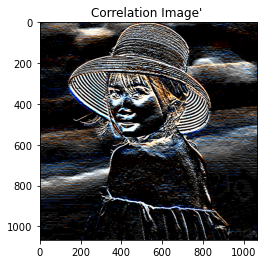

In [59]:
corr_pic2  = ndimage.correlate(pic_as_array, rgb_kernel)
plt.imshow(corr_pic2)
plt.title("Correlation Image' ")

#### Perbedaan gambar antara konvolusi, korelasi, serta korelasi dengan kernel diputar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, "Different of convolution - correlation'")

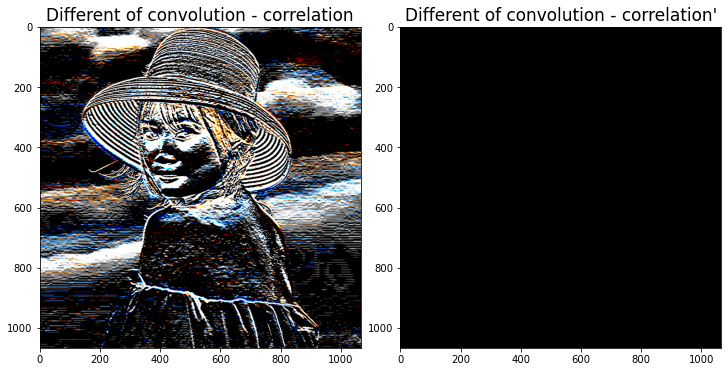

In [60]:
diff_1 = conv_pic - corr_pic
diff_2 = conv_pic - corr_pic2

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
spec = fig.add_gridspec(ncols = 2, figure = fig)

ax1 = fig.add_subplot(spec[0])
ax1.imshow(diff_1)
ax1.set_title('Different of convolution - correlation', fontsize = 17)

ax2 = fig.add_subplot(spec[1])
ax2.imshow(diff_2)
ax2.set_title("Different of convolution - correlation'", fontsize = 17)


### Summary of the results No. 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, "Different of convolution - correlation' ")

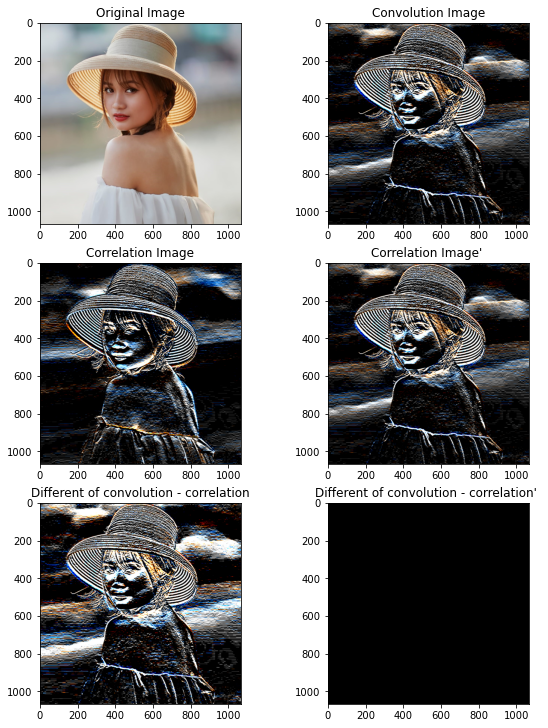

In [61]:
fig = plt.figure(figsize=(8, 10), constrained_layout=True)
spec = fig.add_gridspec(ncols = 2, nrows =3, figure = fig)

ax1 = fig.add_subplot(spec[0,0])
ax1.imshow(pic)
ax1.set_title('Original Image')

ax2 = fig.add_subplot(spec[0,1])
ax2.imshow(conv_pic)
ax2.set_title("Convolution Image")

ax3 = fig.add_subplot(spec[1,0])
ax3.imshow(corr_pic)
ax3.set_title("Correlation Image")

ax4 = fig.add_subplot(spec[1,1])
ax4.imshow(corr_pic2)
ax4.set_title("Correlation Image' ")

ax5 = fig.add_subplot(spec[2,0])
ax5.imshow(diff_1)
ax5.set_title("Different of convolution - correlation")

ax6 = fig.add_subplot(spec[2,1])
ax6.imshow(diff_2)
ax6.set_title("Different of convolution - correlation' ")


Gambar 6 dapat membuktikan bahwa konvolusi adalah korelasi yang kernelnya dirotasi $180^{\circ}$. Karena dapat dilihat bahwa *different* atau perbedaan antara hasil gambar konvolusi dengan gambar korelasi' (yang kernelnya telah dirotasi) berwarna hitam yang menunjukkan hasil 0.

### **2. Buat script perhitungan konvolusi secara langsung dan konvolusi dengan transformasi Fourier. Hitung waktu running untuk masing-masing proses konvolusi**

In [62]:
import time
from scipy import signal
from skimage.io import imread
import matplotlib.pylab as pylab 
import timeit

#### Konvolusi Secara Langsung (Scipy Convole) dengan Gaussian blur kernel

C:\Users\MALLIKA\AppData\Local\Temp/ipykernel_11912/1106971572.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


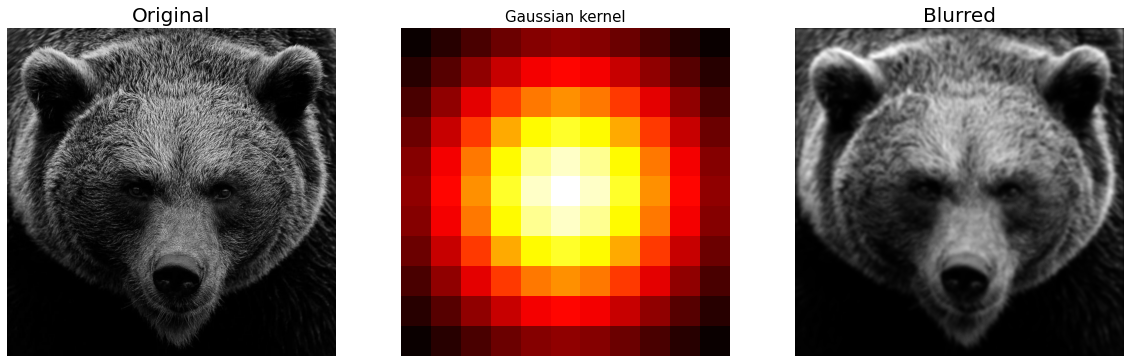

In [63]:
im = np.mean(imread('../Tugas PCD_Konvolusi/bear.jpg'), axis=2)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
im_blurred1 = signal.convolve(im, gauss_kernel, mode='same')

fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3,figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel, cmap='hot')
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred1, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()


#### Konvolusi dengan Transformasi Fourier (Scipy fftconvole) dengan Gaussian blur kernel

(678, 679)


C:\Users\MALLIKA\AppData\Local\Temp/ipykernel_11912/2053049452.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


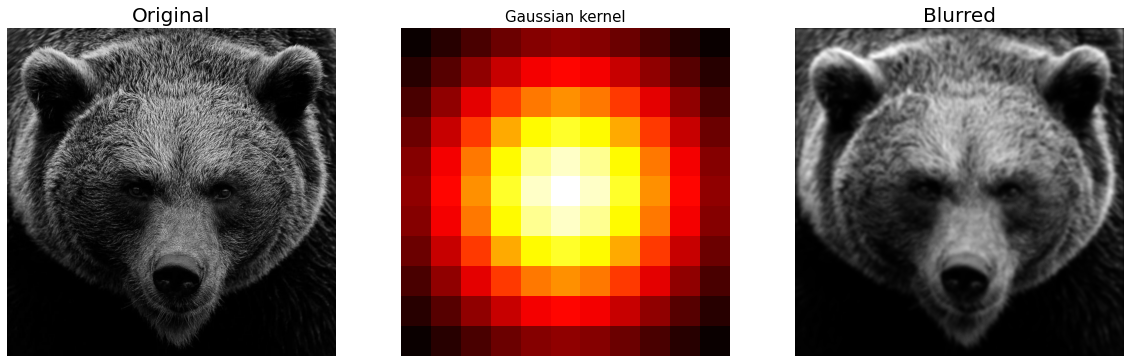

In [64]:
im = np.mean(imread('../Tugas PCD_Konvolusi/bear.jpg'), axis=2)
print(im.shape)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')
fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3,
figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel, cmap='hot')
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred2, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

#### Perbandingan runtimes pada SciPy convolve()  dan fftconvolve() dengan Gaussian blur kernel

In [68]:
im = np.mean(imread('../Tugas PCD_Konvolusi/cat.jpg'), axis=2)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')
def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve
wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)

times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)


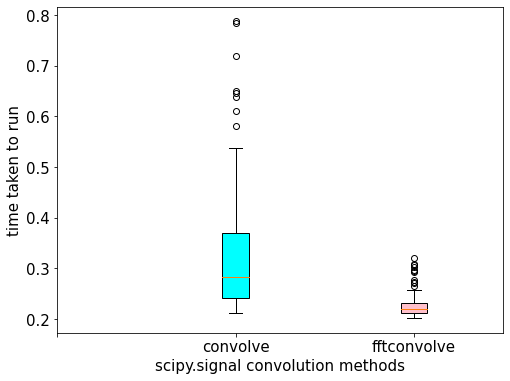

In [69]:
data = [times1, times2]
pylab.figure(figsize=(8,6))
box = pylab.boxplot(data, patch_artist=True) #notch=True,
colors = ['cyan', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
pylab.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15)
pylab.yticks(fontsize=15)
pylab.xlabel('scipy.signal convolution methods', size=15)
pylab.ylabel('time taken to run', size = 15)
pylab.show()

Berdasarkan grafik di atas maka dapat dikatakan bahwa runtimes konvulasi dengan FFT lebih singkat dibandingkan konvulasi secara langsung. 

### Summary of the results No. 2

(<AxesSubplot:title={'center':'ffconvolve Output'}>,
 Text(0.5, 1.0, 'ffconvolve Output'),
 (-0.5, 678.5, 677.5, -0.5))

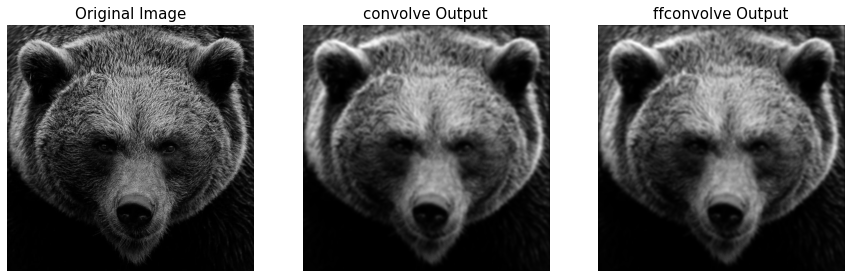

In [67]:
im = np.mean(imread('../Tugas PCD_Konvolusi/bear.jpg'), axis=2)
im_blurred1 = signal.convolve(im, gauss_kernel, mode='same')
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')

pylab.figure(figsize=(15,5))
pylab.gray()
pylab.subplot(131), pylab.imshow(im), pylab.title('Original Image',size=15), pylab.axis('off')
pylab.subplot(132), pylab.imshow(im_blurred1), pylab.title('convolve Output', size=15), pylab.axis('off')
pylab.subplot(133), pylab.imshow(im_blurred2), pylab.title('ffconvolve Output', size=15),pylab.axis('off')